In [2]:
import torch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import json
from wordcloud import WordCloud
import numpy as np


Embeddings PCA scaling

torch.Size([50, 384])


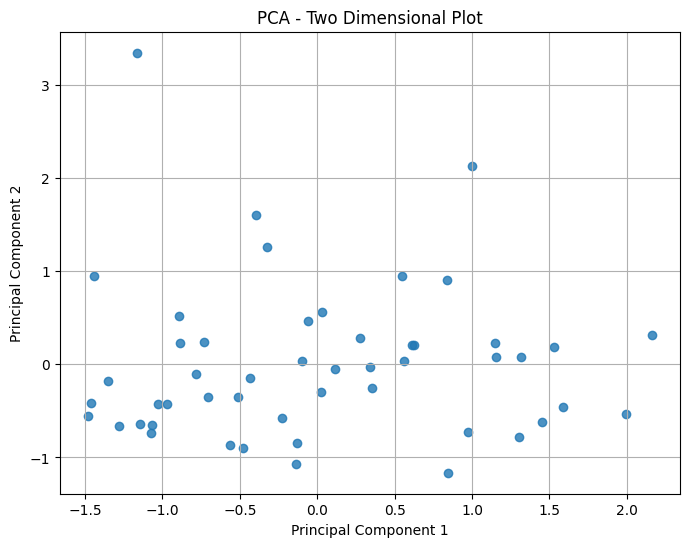

In [3]:
tensor = torch.load('lyrics_embeddings.pt')
numpy_array = tensor.numpy()
pca = PCA(n_components=2)
pca.fit(numpy_array)
transformed_data = pca.transform(numpy_array)
transformed_tensor = torch.from_numpy(transformed_data)

print(tensor.shape)
plt.figure(figsize=(8, 6))
plt.scatter(transformed_tensor[:, 0], transformed_tensor[:, 1], alpha=0.8)
plt.title('PCA - Two Dimensional Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [ ]:
Sentiment Analysis

[1.0, 2.0, 5.0, 3.0, 3.6666666666666665, 4.0, 2.6666666666666665, 1.6666666666666667, 2.3333333333333335, 3.5]


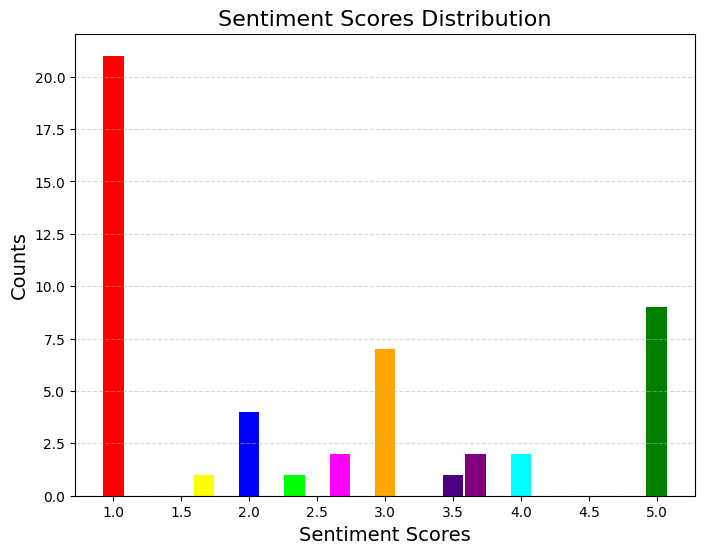

In [4]:
with open('sentiment_topics.json', 'r') as file:
    data = json.load(file)

score_count = {}
for entry in data:
    sentiment_score = entry.get('sentiment_score')
    if isinstance(sentiment_score, float):
        if sentiment_score in score_count:
            score_count[sentiment_score] += 1
        else:
            score_count[sentiment_score] = 1

scores = list(score_count.keys())
counts = list(score_count.values())

colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'lime', 'indigo']

plt.figure(figsize=(8, 6))
bars = plt.bar(scores, counts, color=colors, width=0.15)
plt.xlabel('Sentiment Scores', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Sentiment Scores Distribution', fontsize=16)
plt.xticks(np.arange(min(scores), max(scores) + 1/2, step=1/2))
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}'))
print(scores)
plt.show()

Topic modelling wordcloud 

 music people shake play fake love games insanity relationships warning mind change PMS overthinking hot and cold love bipolar apologies distance nostalgia communication emotional impact fire love scars regret heart ruling the world loss of power Jerusalem bells Roman Cavalry choirs Saint Peter girl dream paradise life stormy night thrift shopping 20 dollars come up thrift shop granddad's clothes love club bar conversation body love addiction danger toxicity desire love hurt fight relationship apology rain umbrella together friend love shine bright diamonds in the sky beautiful eye to eye tonight ball hard mothafuckers fine Paris money world dance price tag happiness music speech rock rhyme Tricky time night changes going out fast driving no regrets getting older education thought control classroom teachers brick in the wall Artwork Experience Edition Immersion Edition Credits Produced Work Harder Faster Stronger Waiting Flexin' Game plan Escape plans Rain dance Lock, Stock street know

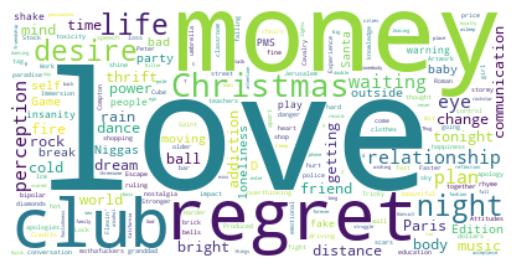

In [6]:
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Read the JSON file
with open('sentiment_topics.json', 'r') as file:
    data = json.load(file)

topics_data = ''

for entry in data:
    topics = entry.get('topics')
    topics_string = ' '.join(topics)
    topics_data += ' ' + topics_string

print(topics_data)

wordcloud = WordCloud(background_color="white").generate(topics_data)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
